# Introduction to Survival Analysis: the Nelson-Aalen estimator

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import NelsonAalenFitter

plt.style.use('seaborn')

In [2]:
%config InlineBackend.figure_format = 'retina'

## Loading and preparing the data

In [3]:
df = pd.read_csv('../data/telco_customer_churn.csv')
df['churn'] = [1 if x == 'Yes' else 0 for x in df['Churn']]

print(f"Shape of the DataFrame: {df.shape}")
print(f"Number of unique users in the DataFrame: {df['customerID'].nunique()}")
df.head()

Shape of the DataFrame: (7043, 22)
Number of unique users in the DataFrame: 7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## Nelson-Aalen Estimate

### Cumulative hazard function

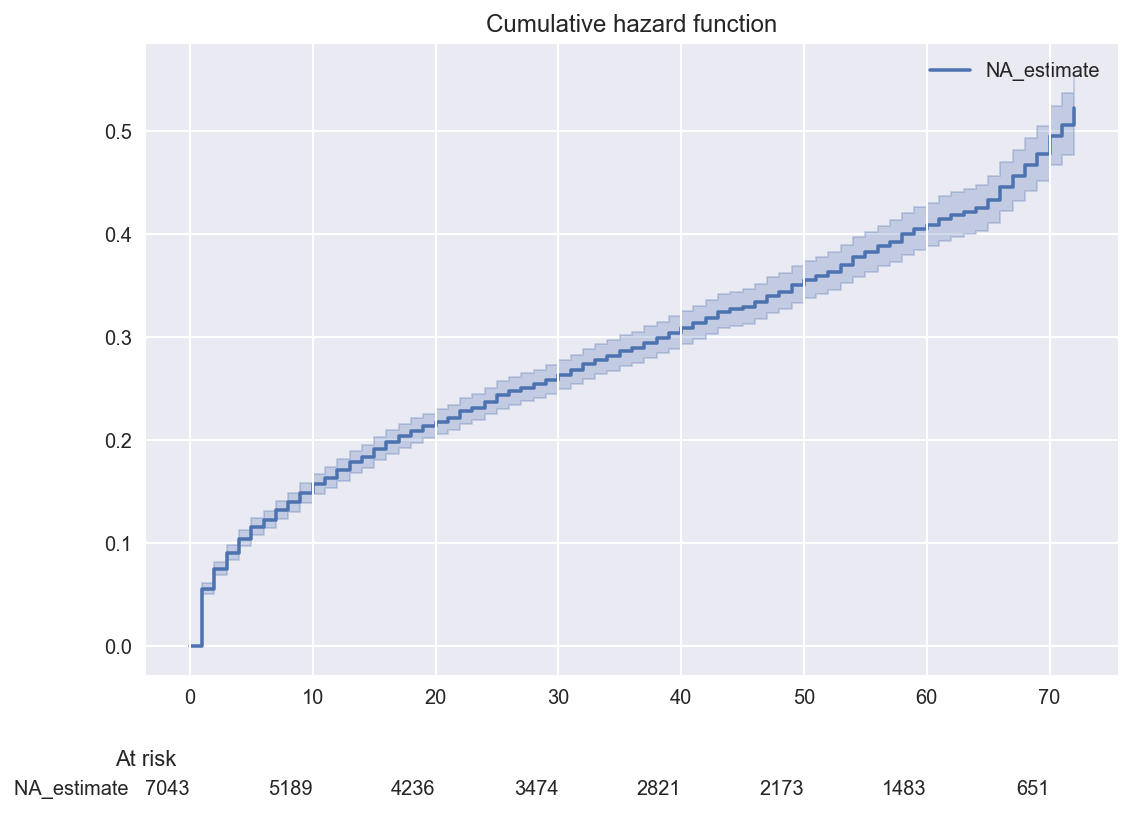

In [4]:
T = df['tenure']
E = df['churn']

naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

naf.plot(at_risk_counts=True)
plt.title('Cumulative hazard function');

In [5]:
# display cumulative hazard
naf.cumulative_hazard_.head()

,NA_estimate
timeline,
0.0,0.000000
1.0,0.055550
2.0,0.074896
3.0,0.090219
4.0,0.104193


In [6]:
# display the event table 
naf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,11,0,11,7043,7043
1,613,380,233,0,7032
2,238,123,115,0,6419
3,200,94,106,0,6181
4,176,83,93,0,5981
...,...,...,...,...,...
68,100,9,91,0,846
69,95,8,87,0,746
70,119,11,108,0,651


### Hazard functions for each payment method

In [7]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

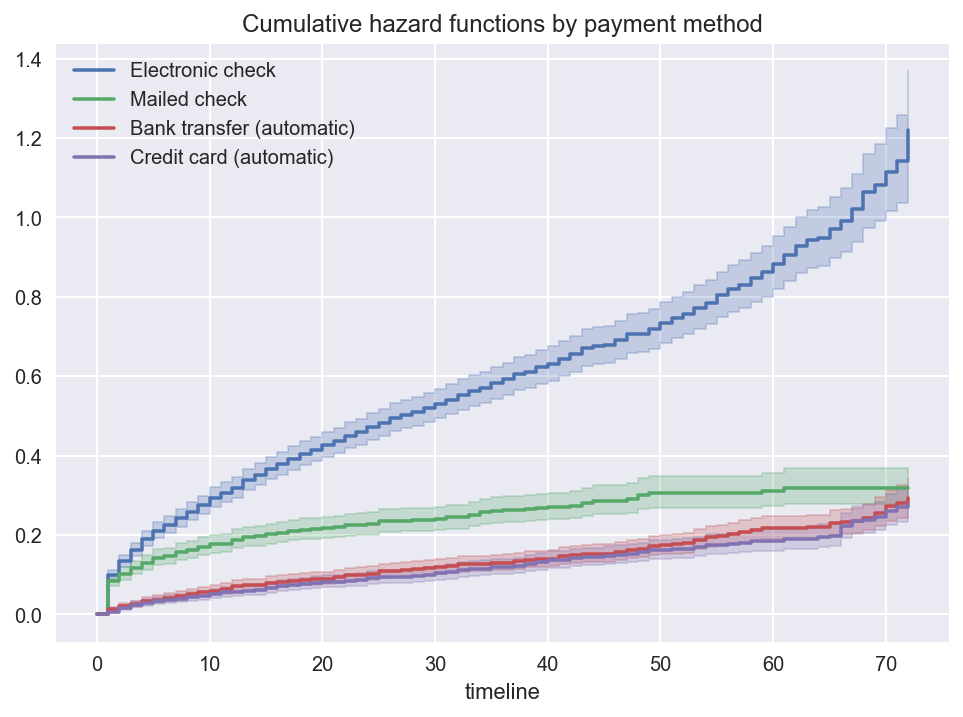

In [8]:
ax = plt.subplot(111)

naf = NelsonAalenFitter()

for payment_method in df['PaymentMethod'].unique():
    
    flag = df['PaymentMethod'] == payment_method
    
    naf.fit(T[flag], event_observed=E[flag], label=payment_method)
    naf.plot(ax=ax)

plt.title('Cumulative hazard functions by payment method');